In [2]:
%matplotlib inline
import os
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

plt.rcParams.update({
    "figure.dpi": 600,
    "figure.figsize": (6, 2.5),
    "font.size": 8,
    "mathtext.fontset": "stix"
})

In [3]:
# Load vmem simulation data
base_dir_vmem = '/Users/susannedahle/CellTypeDependenceElStim/simulation_data/vmem_data_neo' 

vmem_amp_file_paths = [
    os.path.join(base_dir_vmem, f'vmem_amp_data_neo_Ez_{i}.npy')
    for i in range(16)
]

vmem_amp_data_list = [
    np.load(path, allow_pickle=True).item()
    for path in vmem_amp_file_paths
]
vmem_amp_data = {}
for data in vmem_amp_data_list:
    vmem_amp_data.update(data)

In [4]:
# Load cdm simulation data
base_dir_cdm = '/Users/susannedahle/CellTypeDependenceElStim/simulation_data/cdm_and_imem_data_neo' 

cdm_amp_file_paths = [
    os.path.join(base_dir_cdm, f'cdm_and_imem_data_neo_{i}.npy')
    for i in range(8)
]

cdm_amp_data_list = [
    np.load(path, allow_pickle=True).item()
    for path in cdm_amp_file_paths
]
cdm_amp_data = {}
for data in cdm_amp_data_list:
    cdm_amp_data.update(data)

In [5]:
selected_cells = ['L4_BP_bIR215_5', "L5_MC_bAC217_1", "L5_TTPC2_cADpyr232_3", "L5_NGC_bNAC219_5", 'L4_SS_cADpyr230_1']

cell_names = {
    'L4_BP_bIR215_5': 'L4 Bipolar cell (BP)',
    "L5_MC_bAC217_1": "L5 Martinotti cell (MC)",
    "L5_TTPC2_cADpyr232_3": "L5 Pyramidal cell (TTPC)",
    "L5_NGC_bNAC219_5": "L5 Neurogliaform cell (NGC)",
    'L4_SS_cADpyr230_1': 'L4 Spiny Stellate cell (SS)'
}

short_cell_names = {
    'L4_BP_bIR215_5': 'L4 BP',
    "L5_MC_bAC217_1": "L5 MC",
    "L5_TTPC2_cADpyr232_3": "L5 TTPC",
    "L5_NGC_bNAC219_5": "L5 NGC",
    'L4_SS_cADpyr230_1': 'L4 SS'
}

cell_vmem_colors = {
    'L4_BP_bIR215_5': "tab:grey",
    "L5_MC_bAC217_1": "tab:cyan",
    "L5_TTPC2_cADpyr232_3": "tab:olive",
    "L5_NGC_bNAC219_5": 'tab:brown',
    'L4_SS_cADpyr230_1': 'tab:pink'
}

cell_cdm_colors = {
    'L4_BP_bIR215_5': "tab:orange",
    "L5_MC_bAC217_1": "tab:blue",
    "L5_TTPC2_cADpyr232_3": "tab:green",
    "L5_NGC_bNAC219_5": 'tab:red',
    'L4_SS_cADpyr230_1': 'tab:purple'
}

In [25]:
def plot_vmem_cdm_comparrison(vmem_amp_data, cdm_amp_data, selected_cells):
    """
    Reproduces Figure 20 with three subplots:
    (A) Soma Vm amplitudes
    (B) CDM amplitudes
    (C) Normalized combined amplitudes
    """

    # --- Create figure and subplots ---
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(8, 2.5))
    fig.subplots_adjust(bottom=0.25, left=0.07, right=0.97, top=0.88, wspace=0.4)
    plt.rcParams['mathtext.fontset'] = 'stix'

    # ---- Subplot A: Soma Vmem Amplitudes ----
    i = 0
    for cell_name, data in vmem_amp_data.items():
        if cell_name in selected_cells:
            freqs = np.array(data["freq"])
            vmem_amps = np.array(data["soma_amp"])
            ax1.loglog(freqs, vmem_amps, lw=1.5, label=short_cell_names[cell_name],
                       color=cell_vmem_colors[cell_name], linestyle='-')
            i += 1

    ax1.set_xlabel("Frequency [Hz]")
    ax1.set_ylabel("Soma $V_\mathrm{m}$ Amplitude [mV]")
    ax1.set_title("Extracellular stimulation")
    ax1.grid(True, linestyle='--', linewidth=0.5)
    ax1.set_ylim(top=0.5)
    ax1.set_xlim(left=1, right=2000)

    # ---- Subplot B: CDM Amplitudes ----
    i = 0
    for cell_name, data in cdm_amp_data.items():
        if cell_name in selected_cells:
            freqs = np.array(data["frequency"])
            amps = np.array(data["cdm_per_input_current"])
            cdm_amps = np.array(data["cdm"])
            ax2.loglog(freqs, cdm_amps, lw=1.5, label=short_cell_names[cell_name], color=cell_cdm_colors[cell_name], linestyle = '--')
            i += 1

    # ax2.set_xlabel("Frequency [Hz]")
    # ax2.set_ylabel("$p_z$ / $I_{in}$ [µm]")
    # ax2.set_title("White noise Input")
    # ax2.grid(True, linestyle='--', linewidth=0.5)
    # #ax2.set_ylim(top=2.5)
    # ax2.set_xlim(left=1, right=2000)

    ax2.set_xlabel("Frequency [Hz]")
    ax2.set_ylabel("Dipole Moment Amplitude [nA·µm]")
    ax2.set_title("White noise Input")
    ax2.grid(True, linestyle='--', linewidth=0.5)
    ax2.set_ylim(top=2.5)
    ax2.set_xlim(left=1, right=2000)


    i = 0
    for cell_name, data in vmem_amp_data.items():
        if cell_name in selected_cells:
            freqs = np.array(data["freq"])
            vmem_amps = np.array(data["soma_amp"])
            ax3.loglog(freqs, vmem_amps, lw=1.5, label=short_cell_names[cell_name],
                       color=cell_vmem_colors[cell_name], linestyle='-')
            i += 1
    # i = 0 # CDM PER INPUT CURRENT SCALING
    # for cell_name, data in cdm_amp_data.items():
    #     if cell_name in selected_cells:
    #         freqs = np.array(data["frequency"])
    #         cdm_amps_scaled = np.array(data["cdm_per_input_current"]/1000)
    #         amps = np.array(data["cdm_per_input_current"])
    #         ax3.loglog(freqs, cdm_amps_scaled, lw=1.5, label=short_cell_names[cell_name], color=cell_cdm_colors[cell_name], linestyle = '--')
    #         i += 1
    i = 0 #CDM SCALING
    for cell_name, data in cdm_amp_data.items():
        if cell_name in selected_cells:
            freqs = np.array(data["frequency"])
            cdm_amps_scaled = np.array(data["cdm"]*0.2)
            ax3.loglog(freqs, cdm_amps_scaled, lw=1.5, label=short_cell_names[cell_name], color=cell_cdm_colors[cell_name], linestyle = '--')
            i += 1

    ax3.set_xlabel("Frequency [Hz]")
    ax3.set_ylabel("[mV]")
    ax3.set_title("Scaled ($V_m = p_z · 0.2$ mV/nA·µm)")
    ax3.grid(True, linestyle='--', linewidth=0.5)
    ax3.set_xlim(left=1, right=2000)

    # ---- Legend underneath all subplots ----
    legend_elements = []
    for cell_name in selected_cells:
        cdm_line = Line2D([0], [0], color=cell_cdm_colors[cell_name], lw=1.5, linestyle='--',
                          label=f'{short_cell_names[cell_name]} ( $p_z$)')
        vmem_line = Line2D([0], [0], color=cell_vmem_colors[cell_name], lw=1.5, linestyle='-',
                           label=f'{short_cell_names[cell_name]} ($V_m$)')
        legend_elements.extend([cdm_line, vmem_line])

    fig.legend(handles=legend_elements,
               loc='lower center',
               ncol=len(selected_cells),
               bbox_to_anchor=(0.5, -0.15),
               handletextpad=1.0,
               columnspacing=1.0,
               frameon=False)
    
    ax1.text(-0.15, 1.05, 'A', transform=ax1.transAxes, fontsize=12, fontweight='bold')
    ax2.text(-0.15, 1.05, 'B', transform=ax2.transAxes, fontsize=12, fontweight='bold')
    ax3.text(-0.15, 1.05, 'C', transform=ax3.transAxes, fontsize=12, fontweight='bold')

    plt.savefig('/Users/susannedahle/Documents/Master/Code/fig_pdfs/neocortical/fig3.pdf', bbox_inches="tight")
    plt.show()


<>:25: SyntaxWarning: invalid escape sequence '\m'
<>:25: SyntaxWarning: invalid escape sequence '\m'
/var/folders/bg/0phzw_wj05x5crg_p858d9b80000gn/T/ipykernel_28956/2145225540.py:25: SyntaxWarning: invalid escape sequence '\m'
  ax1.set_ylabel("Soma $V_\mathrm{m}$ Amplitude [mV]")


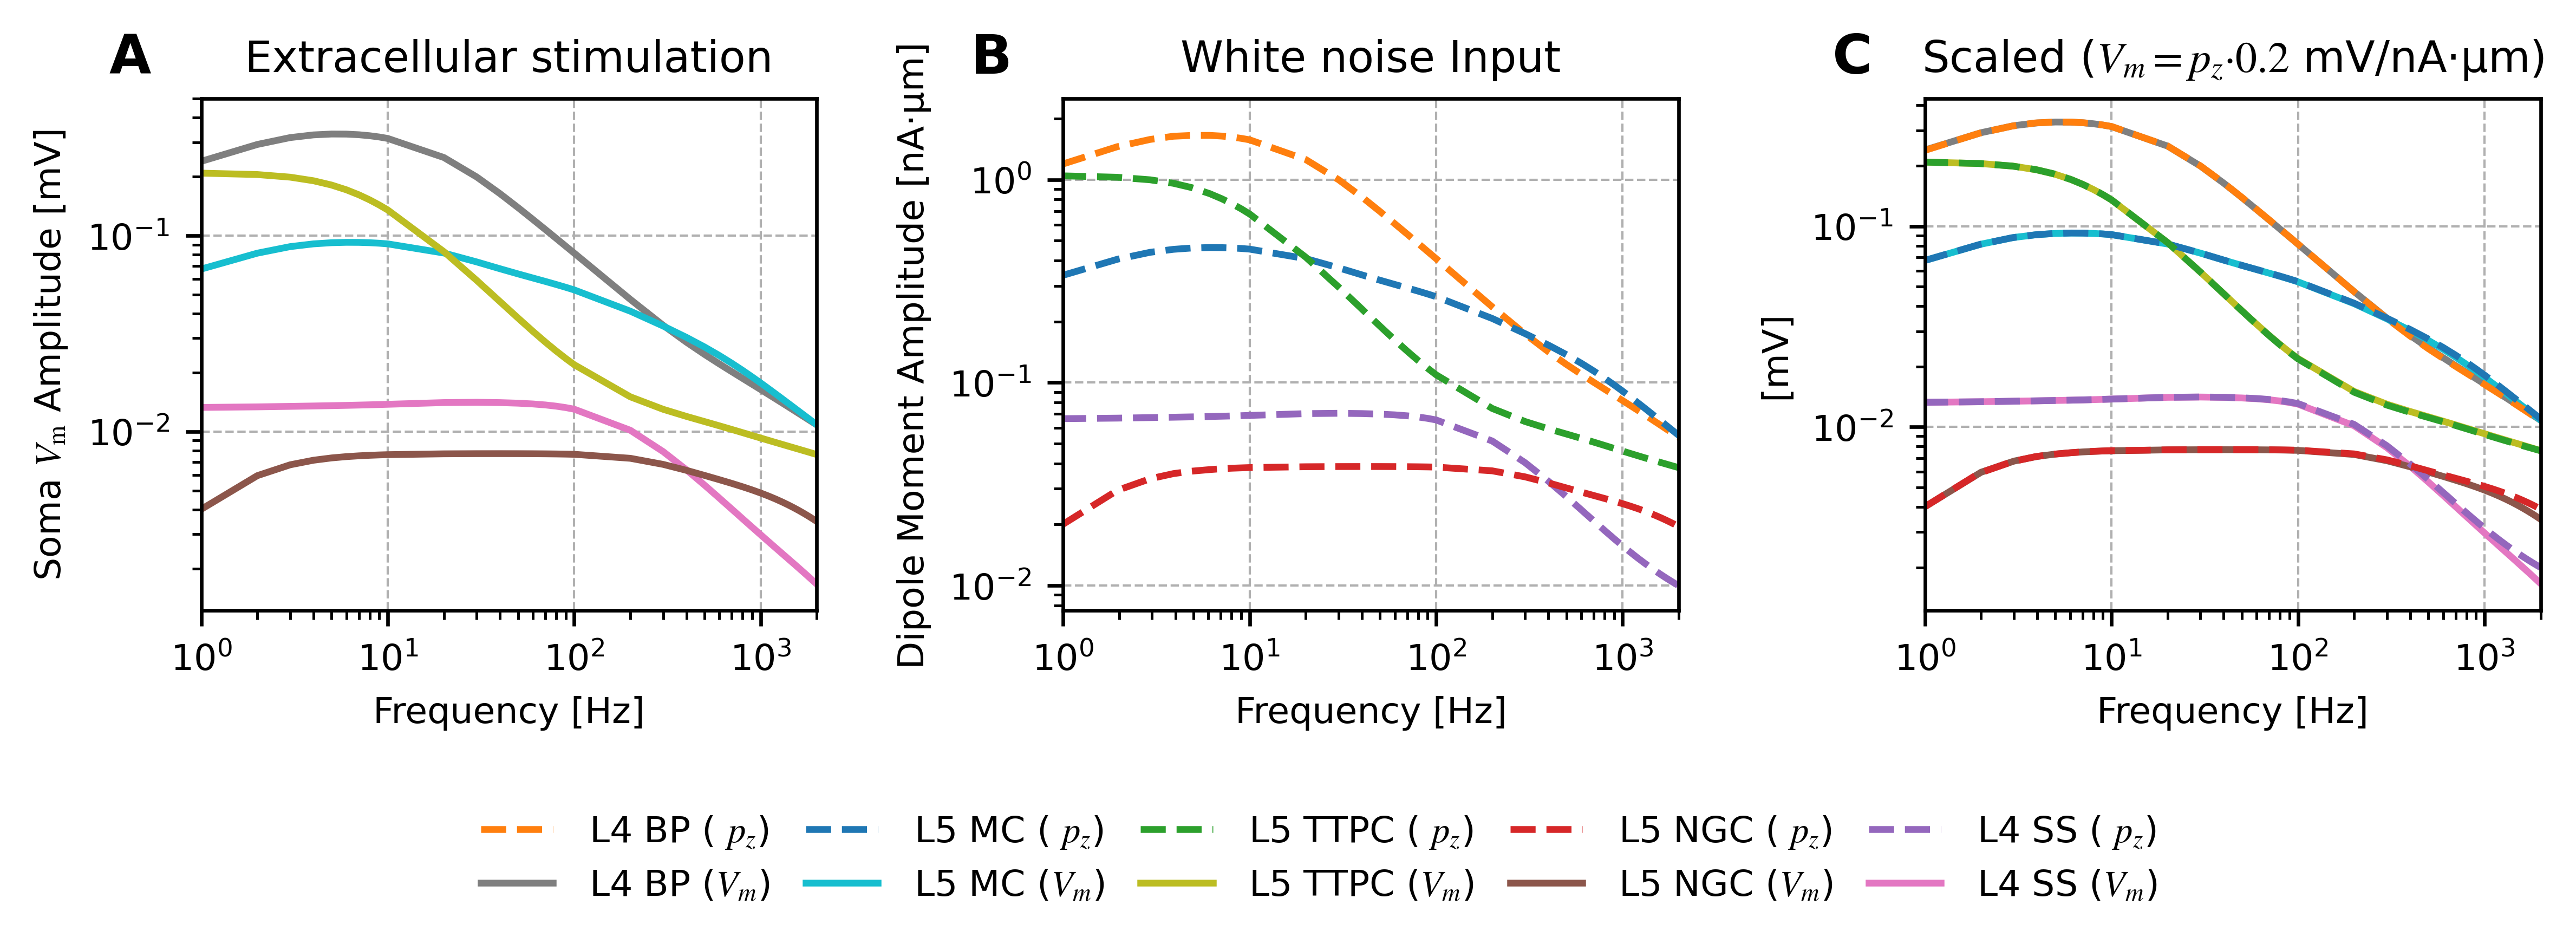

In [26]:
plot_vmem_cdm_comparrison(vmem_amp_data, cdm_amp_data, selected_cells)

In [8]:
1/(0.21*10**-3)

4761.9047619047615